# Un exemple d'utilisation de fichier sismo ph5

On veut comparer : 
* les données RESOLVE PH5
* les données RESOLVE MSEED qui ont été converties (with gap-filling -> 0) en HDF5 : EXP000 : https://gricad-gitlab.univ-grenoble-alpes.fr/lecoinal/resolve/wikis/preprocess

# Les données RESOLVE PH5

Elles sont dispo ici : /summer/resolve/Argentiere/DATA/PH5 (depuis machines GriCAD) ou /data/projects/resolve/Argentiere/DATA/PH5 (depuis machines ISTerre). Il s'agit du même volume SUMMER.

On y trouve 2490 ( = 3 * 830) datasets d'1 heure correspondant à la station AR010.
```
> luke:/summer/resolve/Argentiere/DATA/PH5$ h5ls miniPH5_00001.ph5/Experiment_g/Receivers_g/Das_g_1X10
Das_t                    Dataset {2490/Inf}
Data_a_0001              Dataset {1800000/Inf}
Data_a_0002              Dataset {1800000/Inf}
[...]
Data_a_2488              Dataset {1800000/Inf}
Data_a_2489              Dataset {1800000/Inf}
Data_a_2490              Dataset {1800000/Inf}
```

En fouillant dans les metadonnées, on comprend que les 830 premiers datasets correspondent au channel 1, puis channel 2, et enfin channel 3.

On extrait uniquement cette heure de données (celle qui commence à cette date: Fri May 11 05:10:44.538000 2018) du fichier ph5, pour le channel 3 (Z ?):
```
> h5copy -i /summer/resolve/Argentiere/DATA/PH5/miniPH5_00001.ph5 -o /tmp/miniPH5_00001.ph5 -p -s /Experiment_g/Receivers_g/Das_g_1X10/Das_t -d /Experiment_g/Receivers_g/Das_g_1X10/Das_t

>  h5copy -i /summer/resolve/Argentiere/DATA/PH5/miniPH5_00001.ph5 -o /tmp/miniPH5_00001.ph5 -p -s /Experiment_g/Receivers_g/Das_g_1X10/Data_a_2061 -d /Experiment_g/Receivers_g/Das_g_1X10/Data_a_2061

> h5copy -i /summer/resolve/Argentiere/DATA/PH5/miniPH5_00001.ph5 -o /tmp/miniPH5_00001.ph5 -p -s /Experiment_g/Receivers_g/Das_g_1X10/Data_a_2490 -d /Experiment_g/Receivers_g/Das_g_1X10/Data_a_2490

> cp /summer/resolve/Argentiere/DATA/PH5/master.ph5 /tmp/.
```

```
> h5dump -d /Experiment_g/Receivers_g/Das_g_1X10/Das_t -s "2060" -c "1" /tmp/miniPH5_00001.ph5
   [...]
   DATASPACE  SIMPLE { ( 2490 ) / ( H5S_UNLIMITED ) }
   SUBSET {
      START ( 2060 );
      STRIDE ( 1 );
      COUNT ( 1 );
      BLOCK ( 1 );
      DATA {
      (2060): {
            "",
            "Data_a_2061",
            "",
            "",
            3,
            401,
            "10.0.0.fcnt",
            0,
            0,
            1800000,
            500,
            1,
            1,
            {
               "Fri May 11 05:10:44 2018",
               1526015444,
               538000,
               "BOTH"
            },
            0
         }
      }
   }
   [...]
```

```           
> h5dump -d /Experiment_g/Receivers_g/Das_g_1X10/Das_t -s "2489" -c "1" /tmp/miniPH5_00001.ph5
   [...]
            {
               "Tue May 29 02:10:44 2018",
               1527559844,
               538000,
               "BOTH"
            },
   [...]

```

# Les données RESOLVE MSEED puis converties en HDF5 par le code de preprocess (dataset EXP000)

Le 11 may 2018, c'est julian day = 131. J'extrais cette journée de mon dataset EXP000
```
> h5copy -i /summer/resolve/Argentiere/ALBANNE/PREPROCESS/EXP000/ZO_2018_131.h5 -o /tmp/ZO_2018_131.h5 -s "ZO.AR010.00.DPZ.D.2018.131" -d "ZO.AR010.00.DPZ.D.2018.131"
```
On veut récupérer l'indice qui correspond à ce starttime 05:10:44.538000 : c'est 500Hz * ( 5h * 3600 + 10min * 60 + 44.538 ) = 9,322,269

J'ai utilisé ce bout de code (extract_1h.py) pour extraire cette heure de donnée, qui devrait donc correspondre parfaitement à Data_a_2061: https://gricad-gitlab.univ-grenoble-alpes.fr/OSUG/RESIF/formations/hdf5/blob/master/notebook/extract_1h.py
Cela crée un fichier ZO_2018_131_1h.h5.



On peut donc directement travailler à partir de ces 2 fichiers :
* /tmp/miniPH5_00001.ph5
* /tmp/ZO_2018_131_1h.h5

Vous pouvez télécharger directement ces 2 fichiers ici: materials/tp2/ : 

```
~/hdf5/materials/tp2$ ls -lh
total 7,7M
-rw-r--r-- 1 lecoinal ondes 4,2M juin   7 22:48 miniPH5_00001.ph5
-rw-r--r-- 1 lecoinal ondes 3,5M juin   7 22:48 ZO_2018_131_1h.h5
~/hdf5/materials/tp2$ h5ls miniPH5_00001.ph5/Experiment_g/Receivers_g/Das_g_1X10
Das_t                    Dataset {2490/Inf}
Data_a_2061              Dataset {1800000/Inf}
Data_a_2490              Dataset {1800000/Inf}
~/hdf5/materials/tp2$ h5ls ZO_2018_131_1h.h5 
ZO.AR010.00.DPZ.D.2018.131 Dataset {1800000}
```


In [1]:
import h5py
h5f = h5py.File('miniPH5_00001.ph5', 'r')

In [2]:
h5f.keys()


<KeysViewHDF5 ['Experiment_g']>

In [3]:
h5f.attrs

<Attributes of HDF5 object at 139774584692584>

In [4]:
h5f['Experiment_g'].keys()

<KeysViewHDF5 ['Receivers_g']>

In [5]:
h5f['Experiment_g/Receivers_g/Das_g_1X10'].keys()

<KeysViewHDF5 ['Das_t', 'Data_a_2061', 'Data_a_2490']>

In [6]:
ph5data = h5f['Experiment_g/Receivers_g/Das_g_1X10/Data_a_2061']

In [7]:
print(ph5data)
print(ph5data[:])


<HDF5 dataset "Data_a_2061": shape (1800000,), type "<i4">
[-271 -315 -131 ... -150 -341 -258]


In [8]:
myh5f = h5py.File('ZO_2018_131_1h.h5','r')
print(myh5f.keys())
h5data = myh5f['ZO.AR010.00.DPZ.D.2018.131']
print(h5data)

<KeysViewHDF5 ['ZO.AR010.00.DPZ.D.2018.131']>
<HDF5 dataset "ZO.AR010.00.DPZ.D.2018.131": shape (1800000,), type "<f4">


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


53687.08267824085 53773.123896384306


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


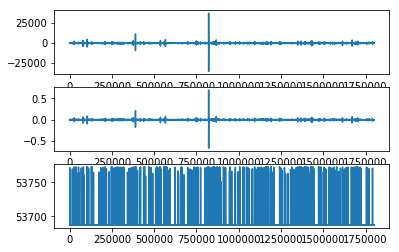

In [9]:
import numpy as np
print(np.nanmin(ph5data[:]/h5data[:]),np.nanmax(ph5data[:]/h5data[:]))
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(311)
plt.plot(ph5data)
plt.subplot(312)
plt.plot(h5data)
plt.subplot(313)
plt.plot(ph5data[:]/h5data[:])

# il y a donc un facteur entre les 2 séries temporelles : un facteur non constant : entre 53687 et 53773 ... ?

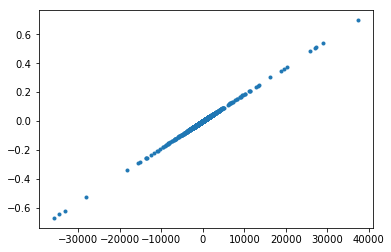

In [10]:
plt.plot(ph5data,h5data,'.')
# on semble pourtant bien synchronisé

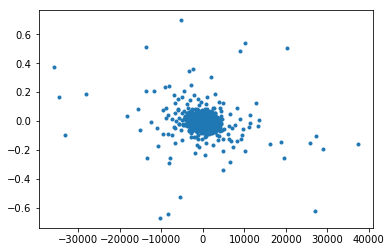

In [11]:
plt.plot(ph5data[1:1800000],h5data[0:1799999],'.')
# si on avait fait ue erreur d'index, on aurait plutot ce scatterplot